#  Fish Track Processing Jupyter Notebook

### Import all of the functions, and read previously saved data

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  
from __future__ import absolute_import
from extract_data import extract_data
from finbeat_calc import finbeat_calc
from store_data import store_data
from read_data import read_data
from make_subset import make_subset
from plot_accel import plot_accel
from plot_track import plot_track
from check_plots import check_plots
from plot_analysis import plot_analysis
from sin_corr import sin_corr
from plot_fit_sine import plot_fit_sine
from fourier_analysis import fourier_analysis
from sort_subset import sort_subset
from cross_corr import cross_corr
from speed_heatmap import speed_heatmap


# If you've never extracted the data before, uncomment the next 2 lines, and comment out the code below them
#tracklist = extract_data()
#finbeats, finbeat_byP, finbeat_byT = finbeat_calc(tracklist.keys(),tracklist)

# If you've extracted the data before, uncomment the next 2 lines, and comment out the code above them
# Read stored data
tracklist, finbeats, finbeat_byP, finbeat_byT = read_data('data.pickle')

### Make useful subsets for later use in functions

In [3]:
bass_subset = make_subset(group_by1='species', identifier1='Bass', tracklist=tracklist)
bass_burst_subset = make_subset(group_by1 = 'species', identifier1='Bass', 
                                 tracklist=tracklist, group_by2 = 'behavior', identifier2='B')
bass_steady_subset = make_subset(group_by1 = 'species', identifier1='Bass', 
                                 tracklist=tracklist, group_by2 = 'behavior', identifier2='S')
bass_linacc_subset = make_subset(group_by1 = 'species', identifier1='Bass', 
                                 tracklist=tracklist, group_by2 = 'behavior', identifier2='A')

trout_subset = make_subset(group_by1 = 'species', identifier1 ='BTrout', tracklist=tracklist)
trout_burst_subset = make_subset(group_by1 = 'species', identifier1='BTrout', 
                                 tracklist=tracklist, group_by2 = 'behavior', identifier2='B')
trout_steady_subset = make_subset(group_by1 = 'species', identifier1='BTrout', 
                                 tracklist=tracklist, group_by2 = 'behavior', identifier2='S')
trout_linacc_subset = make_subset(group_by1 = 'species', identifier1='BTrout', 
                                 tracklist=tracklist, group_by2 = 'behavior', identifier2='A')


### Fit sine waves to data, find the correlations, plot the fit

In [4]:
bass_steady_corr_w_sin = sin_corr(bass_steady_subset, tracklist, finbeat_byT)
trout_steady_corr_w_sin = sin_corr(trout_steady_subset, tracklist, finbeat_byT)

bass_linacc_corr_w_sin = sin_corr(bass_linacc_subset, tracklist, finbeat_byT)
trout_linacc_corr_w_sin = sin_corr(trout_linacc_subset, tracklist, finbeat_byT)

bass_burst_corr_w_sin = sin_corr(bass_burst_subset, tracklist, finbeat_byT)
trout_burst_corr_w_sin = sin_corr(trout_burst_subset, tracklist, finbeat_byT)

corr_w_sin = sin_corr(tracklist.keys(), tracklist, finbeat_byP)

#bass_steady_corr_w_sin
#plot_fit_sine(trout_subset, tracklist, corr_w_sin)

C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  t_squared = r**2 * (df / ((1.0 - r) * (1.0 + r)))
C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:5084: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


In [5]:
#corr_w_sin.sort_values(by=['Behavior', 'InitSpd'])
#plot_fit_sine(['BTrout1S11'], tracklist, corr_w_sin)



### Messing around with correlation heatmaps

In [6]:
bass_steady_corr_sort = bass_steady_corr_w_sin.sort_values(by=['Behavior', 'InitSpd', 'Pearsons'], ascending = False)
trout_steady_corr_sort = trout_steady_corr_w_sin.sort_values(by=['Behavior', 'InitSpd', 'Pearsons'], ascending = False)

bass_linacc_corr_sort = bass_linacc_corr_w_sin.sort_values(by=['Behavior', 'InitSpd', 'Pearsons'], ascending = False)
trout_linacc_corr_sort = trout_linacc_corr_w_sin.sort_values(by=['Behavior', 'InitSpd', 'Pearsons'], ascending = False)

bass_burst_corr_sort = bass_burst_corr_w_sin.sort_values(by=['Behavior', 'InitSpd', 'Pearsons'], ascending = False)
trout_burst_corr_sort = trout_burst_corr_w_sin.sort_values(by=['Behavior', 'InitSpd', 'Pearsons'], ascending = False)

#bass_steady_corr_sort

In [7]:
import pandas as pd
import numpy as np
bass_steady_corr_sort= bass_steady_corr_sort.dropna(axis=0, how='any')
bass_steady_corr_sort['Pearsons']= bass_steady_corr_sort['Pearsons'].apply(pd.to_numeric)

bass_linacc_corr_sort= bass_linacc_corr_sort.dropna(axis=0, how='any')
bass_linacc_corr_sort['Pearsons']= bass_linacc_corr_sort['Pearsons'].apply(pd.to_numeric)

bass_burst_corr_sort= bass_burst_corr_sort.dropna(axis=0, how='any')
bass_burst_corr_sort['Pearsons']= bass_burst_corr_sort['Pearsons'].apply(pd.to_numeric)

import seaborn as sns
import matplotlib.pyplot as plt
#sns.heatmap(bass_steady_corr_sort[['Pearsons']], cmap = 'RdBu_r', vmin = 0.0, vmax = 1.0, square = True)
#plt.show()

#sns.heatmap(bass_linacc_corr_sort[['Pearsons']], cmap = 'RdBu_r', vmin = 0.0, vmax = 1.0, square = True)
#plt.show()

#sns.heatmap(bass_burst_corr_sort[['Pearsons']], cmap = 'RdBu_r', vmin = 0.0, vmax = 1.0, square = True)
#plt.show()

In [8]:
trout_steady_corr_sort= trout_steady_corr_sort.dropna(axis=0, how='any')
trout_steady_corr_sort['Pearsons']= trout_steady_corr_sort['Pearsons'].apply(pd.to_numeric)

trout_linacc_corr_sort= trout_linacc_corr_sort.dropna(axis=0, how='any')
trout_linacc_corr_sort['Pearsons']= trout_linacc_corr_sort['Pearsons'].apply(pd.to_numeric)

trout_burst_corr_sort= trout_burst_corr_sort.dropna(axis=0, how='any')
trout_burst_corr_sort['Pearsons']= trout_burst_corr_sort['Pearsons'].apply(pd.to_numeric)

#sns.heatmap(trout_steady_corr_sort[['Pearsons']], cmap = 'RdBu_r', square = True, vmin =0.0, vmax=1.0)
#plt.show()

#sns.heatmap(trout_linacc_corr_sort[['Pearsons']], cmap = 'RdBu_r', square = True, vmin =0.0, vmax=1.0)
#plt.show()

#sns.heatmap(trout_burst_corr_sort[['Pearsons']], cmap = 'RdBu_r', square = True, vmin =0.0, vmax=1.0)
#plt.show()

### Calculate pairwise max. cross-correlation and it's associated phase shift of FFTs

Note: There's something wrong here that has to do with relative lengths of each trial. Not sure this approach is valid.

Note 3/26/2017: Padding the ends of the shorter Fourier transforms seems to have helped some. Maybe. 

In [9]:
bass_subset = sort_subset(bass_subset, tracklist)
trout_subset = sort_subset(trout_subset, tracklist)

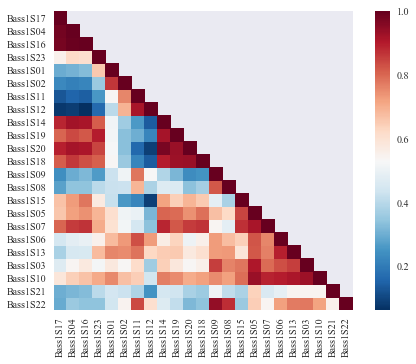

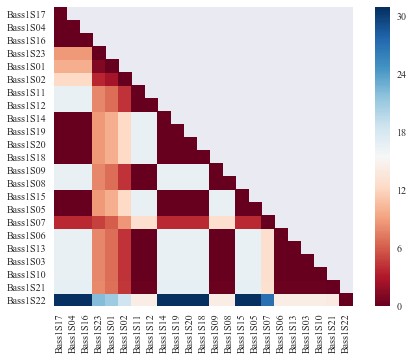

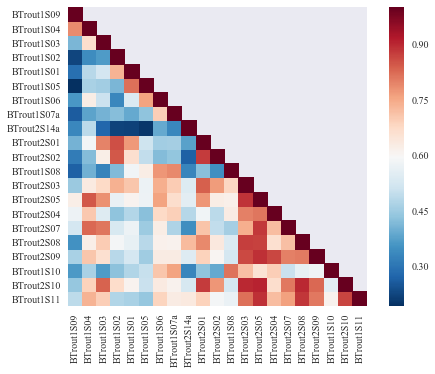

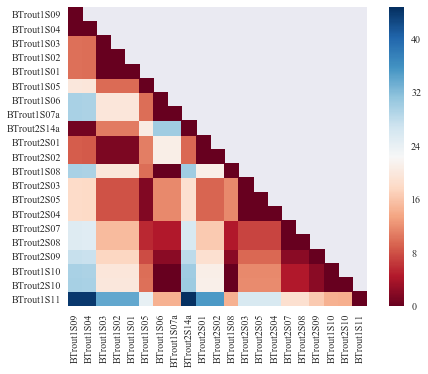

In [10]:
bass_cross_corr = cross_corr(bass_subset, tracklist)
trout_cross_corr = cross_corr(trout_subset, tracklist)

bass_speeds = speed_heatmap(bass_subset, tracklist)
trout_speeds = speed_heatmap(trout_subset, tracklist)

mask_bass = np.zeros_like(bass_cross_corr, dtype=np.bool)
mask_bass[np.triu_indices_from(mask_bass,k=1)] = True

mask_trout = np.zeros_like(trout_cross_corr, dtype=np.bool)
mask_trout[np.triu_indices_from(mask_trout,k=1)] = True

import seaborn as sns
plt.style.use('mystyle.mplstyle')
sns.heatmap(bass_cross_corr,mask=mask_bass,cmap = 'RdBu_r',square=True)
plt.show()
sns.heatmap(bass_speeds, mask=mask_bass, cmap ='RdBu', square=True)
plt.show()
sns.heatmap(trout_cross_corr,mask=mask_trout,cmap = 'RdBu_r',square=True)
plt.show()
sns.heatmap(trout_speeds, mask=mask_trout, cmap ='RdBu', square=True)
plt.show()

### Making Figures

In [75]:
def plot_trace_forfig(rows, columns, number, trial, tracklist):
    """Plots finbeats in (period, amplitude, acceleration) space.

        This function takes finbeat data from a specified output of
        finbeat_calc(), and plots each individual finbeat in (period,
        amplitude, maximum acceleration) space. The finbeat_data argument
        specifies whether the finbeats to be plotted come from peak-to-peak
        or trough-to-trough calculations. The maximum acceleration is the
        maximum acceleration between the finbeat start and finbeat end
        times. The number of total finbeats is printed at the end.

        Args:
            subset_name (string): some string identifying what's in your
                                    subset, to be used as the plot title
            finbeats_subset (list): a list of strings with the trial
                                names of the desired trials from finbeats.
                                 Note: The list (even of a single
                                 element) must be contained in square
                                 brackets. You'll probably want to use
                                 the subset generating function:
                                 make_subset()
            finbeat_data (dict): use either finbeat_byP to do analysis
                                on finbeats as defined by peaks first,
                                or finbeat_byT to use finbeats defined by
                                troughs first. These must be created
                                beforehand by the function finbeat_calc()
            zaxis (str): must be of value "A" or "V". Indicates whether to plot
                            acceleration or velocity.
            tracklist (dict): the compiled position, velocity,
                              and acceleration data for all trials
                               produced by extract_data()
            lines (Bool): if True, adds lines up from x-y plane to z_value
            cutoff (Bool): if True, cuts off z axis at hard-coded maximum value
            save (Bool): if True, saves to svg instead of printing to screen

        Returns:
            Nothing
        """

    raw_data = tracklist[trial]['data']['pt2y']
    behavior = tracklist[trial]['behavior']
    fish = tracklist[trial]['fish']
    init_speed = tracklist[trial]['start_spd_BLs']
    base = peakutils.baseline(raw_data, 3)  # Find bkgrd trend
    raw_data = raw_data - base
    time = raw_data.index.values

    if fish == 'Bass1':
        col = 'darkblue'
    else:
        col = 'darkred'

    ax = fig3.add_subplot(rows, columns, number)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Tail Tip Position (cm)')
    ax.plot(time, raw_data, col)

    return ax

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import peakutils

matplotlib.rc('axes.formatter', useoffset=False)


def plot_fft_forfig(rows, columns, number,
                    trial, tracklist):
    """Computes full width at half maximum from FFT of tailbeat movement

        Args:
            tracklist_subset (list): a list of strings with the trial
                                names of the desired trials from tracklist.
                                 Note: The list (even of a single
                                 element) must be contained in square
                                 brackets.
                                 Also note: Alternatively, to iterate
                                 over all trials, set this to
                                 tracklist.keys()
            tracklist (dict): a tracklist produced by extract_data()
        Returns:
        """

    trial_name = tracklist[trial]['sequence']
    # print(trial_name)  # for diagnostics
    fish = tracklist[trial]['fish']
    tailtip = tracklist[trial]['data']['pt2y_smth']
    time = tracklist[trial]['data'].index.values
    base = peakutils.baseline(tailtip, 1)  # Find linear bkgrd trend
    framerate = tracklist[trial]['FPS']
    behavior = tracklist[trial]['behavior']

    if fish == 'Bass1':
        col = 'cornflowerblue'
    else:
        col = 'salmon'

    # Do the FFT using Scipy
    tailbeat_freqs = np.fft.fft(tailtip - base)
    frequency_domain = np.fft.fftfreq(len(time), 1 / framerate)

    ax = fig3.add_subplot(rows, columns, number)
    ax.plot(np.abs(frequency_domain),
            np.abs(tailbeat_freqs), col)
    ax.set_xlim(0, 12)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Magnitude')

    return ax

import peakutils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def plot_fit_sine_forfig(nrows, ncols, number, trial, tracklist,
                         sin_corr_df):
    raw_data = tracklist[trial]['data']['pt2y']
    fish = tracklist[trial]['fish']
    base = peakutils.baseline(raw_data, 3)  # Find bkgrd trend
    raw_data = raw_data - base
    time = raw_data.index.values

    if fish == 'Bass1':
        col1 = 'darkblue'
        col2 = 'cornflowerblue'
    else:
        col1 = 'darkred'
        col2 = 'salmon'

    amp = sin_corr_df['Est.Amplitude'][trial]
    freq = sin_corr_df['Est.Freq'][trial]
    phase = sin_corr_df['Est.Phase'][trial]
    offset = sin_corr_df['Est.Offset'][trial]
    cor_coeff = str(np.round(sin_corr_df['Pearsons'][trial], 2))
    pvalue = str(np.round(sin_corr_df['Pvalue'][trial], 3))
    annotation = str('r = ' + cor_coeff + '\np = ' + pvalue)

    data_fit = amp * np.sin(2 * np.pi * freq * time + phase) + offset

    ax = fig4.add_subplot(nrows, ncols, number)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Position (cm)')
    ax.plot(time, raw_data, col1, label='Tail Tip Data', lw=3)
    ax.plot(time, data_fit, col2, label="Sine Wave Fit", lw=2)
    t = ax.text(0.02, 0.97, annotation, horizontalalignment='left',
                verticalalignment='top', transform=ax.transAxes)
    t.set_bbox(dict(alpha=0.8, edgecolor='black', facecolor='white'))

    return ax
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd


def plot_analysis_forfig(rows, columns, number, finbeats_subset,
                         finbeat_data, tracklist, zaxis='A', lines=True,
                         cutoff=False):
    """Plots finbeats in (period, amplitude, acceleration) space.

    This function takes finbeat data from a specified output of
    finbeat_calc(), and plots each individual finbeat in (period,
    amplitude, maximum acceleration) space. The finbeat_data argument
    specifies whether the finbeats to be plotted come from peak-to-peak
    or trough-to-trough calculations. The maximum acceleration is the
    maximum acceleration between the finbeat start and finbeat end
    times. The number of total finbeats is printed at the end.

    Args:
        subset_name (string): some string identifying what's in your
                                subset, to be used as the plot title
        finbeats_subset (list): a list of strings with the trial
                            names of the desired trials from finbeats.
                             Note: The list (even of a single
                             element) must be contained in square
                             brackets. You'll probably want to use
                             the subset generating function:
                             make_subset()
        finbeat_data (dict): use either finbeat_byP to do analysis
                            on finbeats as defined by peaks first,
                            or finbeat_byT to use finbeats defined by
                            troughs first. These must be created
                            beforehand by the function finbeat_calc()
        zaxis (str): must be of value "A" or "V". Indicates whether to plot
                        acceleration or velocity.
        tracklist (dict): the compiled position, velocity,
                          and acceleration data for all trials
                           produced by extract_data()
        lines (Bool): if True, adds lines up from x-y plane to z_value
        cutoff (Bool): if True, cuts off z axis at hard-coded maximum value
        save (Bool): if True, saves to svg instead of printing to screen

    Returns:
        Nothing
    """
    speeds_cb = [0] * len(tracklist.keys())
    count_cb = 0
    for i in tracklist.keys():
        speeds_cb[count_cb] = tracklist[i]['start_spd']
        count_cb += 1
    speed_cb = max(speeds_cb)

    count_n = 0  # start counting finbeats

    # find max initial speed for coloring by speed
    speeds = []
    for trial in finbeats_subset:
        speeds.append(tracklist[trial]['start_spd'])
    max_spd = max(speeds)

    # find x and y max and min axis limits
    x_vals = []
    y_vals = []
    z_vals = []
    for trial in finbeats_subset:
        for finbeat in finbeat_data[trial].index.values:
            x_vals.append(finbeat_data[trial]['period'][finbeat])
            y_vals.append(finbeat_data[trial]['amplitude'][finbeat])

    x_max = np.nanmax(x_vals)
    y_max = np.nanmax(y_vals)

    # Pull a colormap
    cm = plt.get_cmap("plasma")

    # Set up the figure and choose an appropriate z-axis label
    ax1 = fig2.add_subplot(rows, columns, number, projection='3d')
    ax1.set_xlabel('Period (s)')
    ax1.set_ylabel('Amplitude (cm)')
    if zaxis == 'V':
        ax1.set_zlabel('\nMax. Inst. Velocity (cm/s)')
    else:
        ax1.set_zlabel('\nMax. Acceleration (cm/s $^2$)')
    ax1.set_xlim3d(0, x_max)
    ax1.set_ylim3d(0, y_max)

    # for each trial of interest
    for trial in finbeats_subset:
        # for each finbeat within that trial
        for finbeat in finbeat_data[trial].index.values:
            # get the period
            # period_mask = finbeat_data[trial]['period'].loc[finbeat]
            period = finbeat_data[trial]['period'][finbeat]

            # get the amplitude
            # amplitude_mask = finbeat_data[trial]['amplitude'].loc[
            # finbeat]
            amplitude = finbeat_data[trial]['amplitude'][finbeat]

            # get the start time
            # start_mask = finbeat_data[trial]['time'].loc[finbeat]
            start = finbeat_data[trial]['time'][finbeat]
            # get the end time
            # end_mask = finbeat_data[trial]['endtime'].loc[finbeat]
            end = finbeat_data[trial]['endtime'][finbeat]

            # find the maximum acceleration or velocity in that time range
            if zaxis == 'A':
                zcolumn = tracklist[trial]['data'][
                              'pt1_net_a'][start:end].max()
                z_vals.append(zcolumn)
            elif zaxis == 'V':
                zcolumn = tracklist[trial]['data'][
                              'pt1_net_v'][start:end].max()
                z_vals.append(zcolumn)
            else:  # If they fuck up, make it acceleration
                zcolumn = tracklist[trial]['data'][
                              'pt1_net_a'][start:end].max()
                z_vals.append(zcolumn)

            # pull the initial speed and behavior
            init_spd = tracklist[trial]['start_spd']
            behavior_type = tracklist[trial]['behavior']
            if behavior_type == 'B':
                behavior = '*'
                size = 60
            elif behavior_type == 'A':
                behavior = 'P'
                size = 50
            else:
                behavior = 'o'
                size = 30

            # add the point
            if cutoff == True and zaxis == 'A':
                z_max = 0.00005
            else:
                z_max = np.nanmax(z_vals)
            if zcolumn <= z_max and lines == True and zcolumn >= 0:
                p = ax1.plot(xs=[period, period], ys=[amplitude, amplitude],
                             zs=[0, zcolumn],
                             linestyle='solid', c=cm(init_spd / max_spd),
                             alpha=0.8, linewidth=0.5)
                p = ax1.scatter3D(xs=period,
                                  ys=amplitude,
                                  zs=zcolumn,
                                  zdir='z', s=size, marker=behavior,
                                  c=init_spd,
                                  cmap=cm, edgecolor='none', vmin=0,
                                  vmax=speed_cb)
                count_n += 1

    ax1.set_zlim3d(0, z_max)
    pane_gray = 1.0
    ax1.w_xaxis.set_pane_color((pane_gray,pane_gray,pane_gray,1.0))
    ax1.w_yaxis.set_pane_color((pane_gray,pane_gray,pane_gray,1.0))
    ax1.w_zaxis.set_pane_color((pane_gray,pane_gray,pane_gray,1.0))
    #cbar = plt.colorbar(p,shrink=0.7, pad = 0.1)
    #cbar.set_label('Initial Speed (cm/s)', rotation=270, labelpad=10)
    #if save == True:
        #plt.savefig(str(subset_name)+".svg", format="svg")
    #else:
        #plt.show()
    #print(count_n)

    return ax1

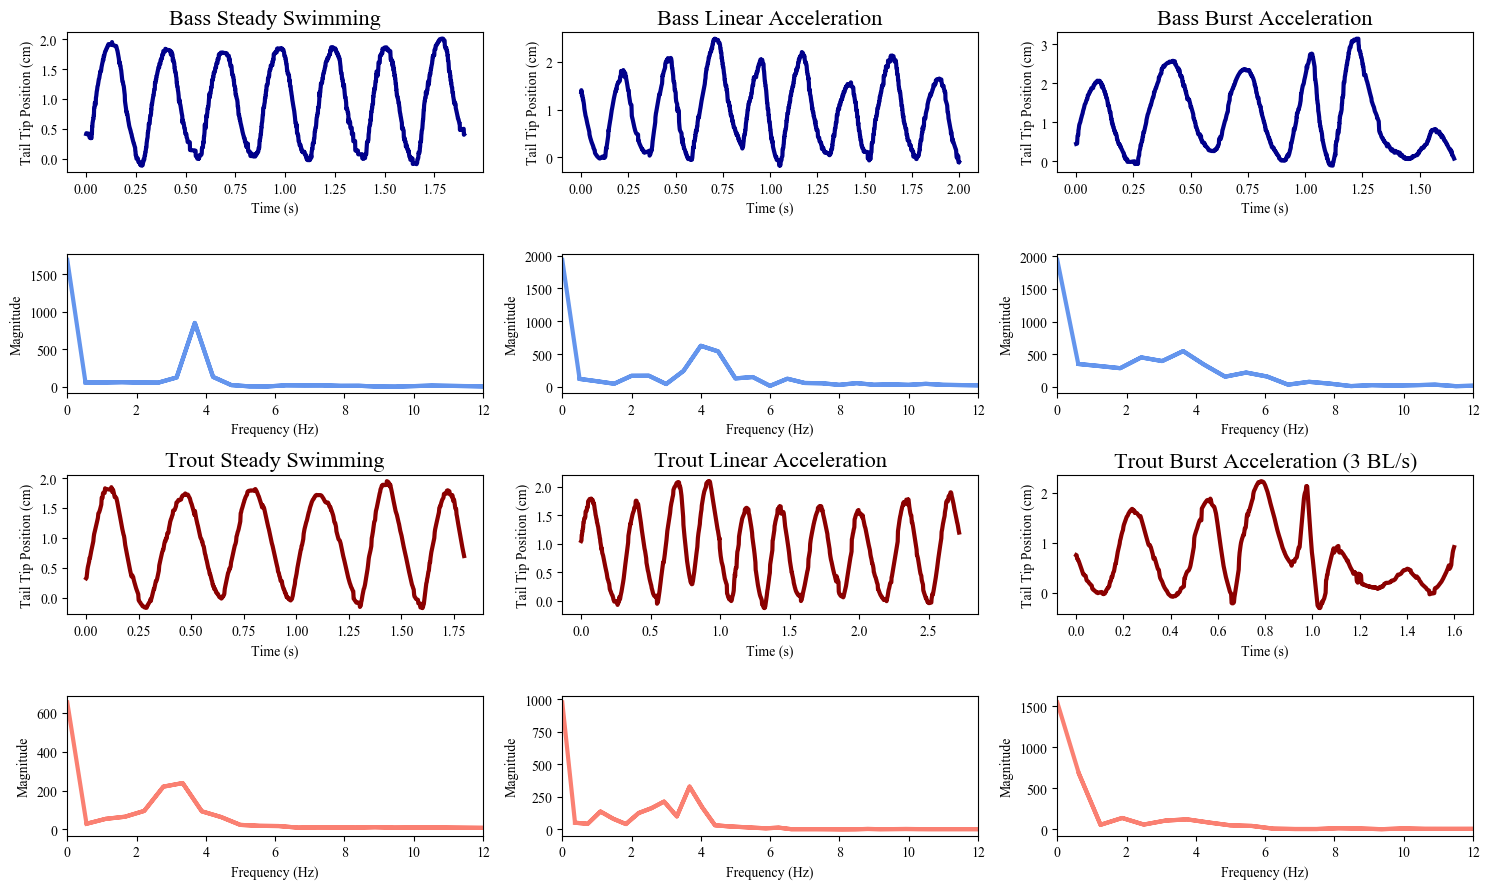

In [32]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.style.use('mystyle.mplstyle')

# Fourier transforms with represetative traces
fig3 = plt.figure(figsize = (15,9))

# Bass Steady De-trended trace, 2Ls
ax1_3 = plot_trace_forfig(4, 3, 1, 'Bass1S11', tracklist)
ax1_3.set_title('Bass Steady Swimming')
# Bass LinAcc De-trended trace,2Ls
ax2_3 = plot_trace_forfig(4, 3, 2, 'Bass1S08', tracklist)
ax2_3.set_title('Bass Linear Acceleration')
# Bass Burst De-trended trace, 2Ls
ax3_3 = plot_trace_forfig(4, 3, 3, 'Bass1S13', tracklist)
ax3_3.set_title('Bass Burst Acceleration')
# Bass Steady FFT
ax4_3 = plot_fft_forfig(4, 3, 4, 'Bass1S11', tracklist)
# Bass LinAcc FFT
ax5_3 = plot_fft_forfig(4, 3, 5, 'Bass1S08', tracklist)
# Bass Burst FFT
ax6_3 = plot_fft_forfig(4, 3, 6, 'Bass1S13', tracklist)
# Trout Steady De-trended trace, 2Ls
ax7_3 = plot_trace_forfig(4, 3, 7, 'BTrout1S03', tracklist)
ax7_3.set_title('Trout Steady Swimming')
# Trout LinAcc De-trended trace, 2Ls
ax8_3 = plot_trace_forfig(4, 3, 8, 'BTrout2S01', tracklist)
ax8_3.set_title('Trout Linear Acceleration')
# Trout Burst De-trended trace, 3Ls
ax9_3 = plot_trace_forfig(4, 3, 9, 'BTrout2S03', tracklist)  
ax9_3.set_title('Trout Burst Acceleration (3 BL/s)')
# Trout Steady FFT, 2Ls
ax10_3 = plot_fft_forfig(4, 3, 10, 'BTrout1S03', tracklist)
# Trout LinAcc FFT, 2Ls
ax11_3 = plot_fft_forfig(4, 3, 11, 'BTrout2S01', tracklist)
 # Trout Burst FFT, 3Ls
ax12_3 = plot_fft_forfig(4, 3, 12, 'BTrout2S03', tracklist) 

plt.tight_layout()
#plt.savefig('Fig3_TailTracesFFTS_2Ls.svg', fmt='svg')
#plt.savefig('Fig3_TailTracesFFTS_2Ls.pdf', fmt='pdf')
plt.show()

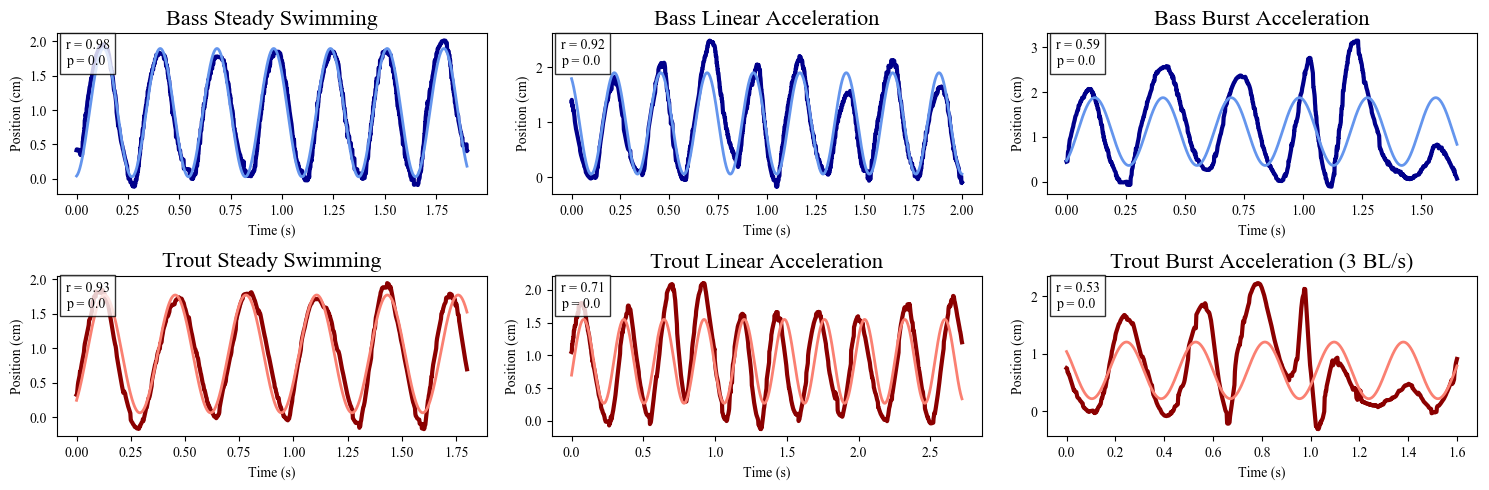

In [33]:
plt.style.use('mystyle.mplstyle')

fig4 = plt.figure(figsize = (15,5))


# Bass Steady De-trended trace, 2Ls
ax1_4 = plot_fit_sine_forfig(2, 3, 1, 'Bass1S11', tracklist, corr_w_sin)
ax1_4.set_title('Bass Steady Swimming')
# Bass LinAcc De-trended trace,2Ls
ax2_4 = plot_fit_sine_forfig(2, 3, 2, 'Bass1S08', tracklist, corr_w_sin)
ax2_4.set_title('Bass Linear Acceleration')
# Bass Burst De-trended trace, 2Ls
ax3_4 = plot_fit_sine_forfig(2, 3, 3, 'Bass1S13', tracklist, corr_w_sin)
ax3_4.set_title('Bass Burst Acceleration')
# Trout Steady De-trended
ax4_3 = plot_fit_sine_forfig(2, 3, 4, 'BTrout1S03', tracklist, 
                             corr_w_sin)
ax4_3.set_title('Trout Steady Swimming')
# Trout LinAcc De-trended trace, 2Ls
ax5_3 = plot_fit_sine_forfig(2, 3, 5, 'BTrout2S01', tracklist, 
                             corr_w_sin)
ax5_3.set_title('Trout Linear Acceleration')
# Trout Burst De-trended trace, 3Ls
ax6_3 = plot_fit_sine_forfig(2, 3, 6, 'BTrout2S03', tracklist, 
                             corr_w_sin)
ax6_3.set_title('Trout Burst Acceleration (3 BL/s)')


plt.tight_layout()
#plt.savefig('Fig4_FitSines_Correls_2Ls.pdf', fmt='pdf')
#plt.savefig('Fig4_FitSines_Correls_2Ls.svg', fmt='svg')
plt.show()

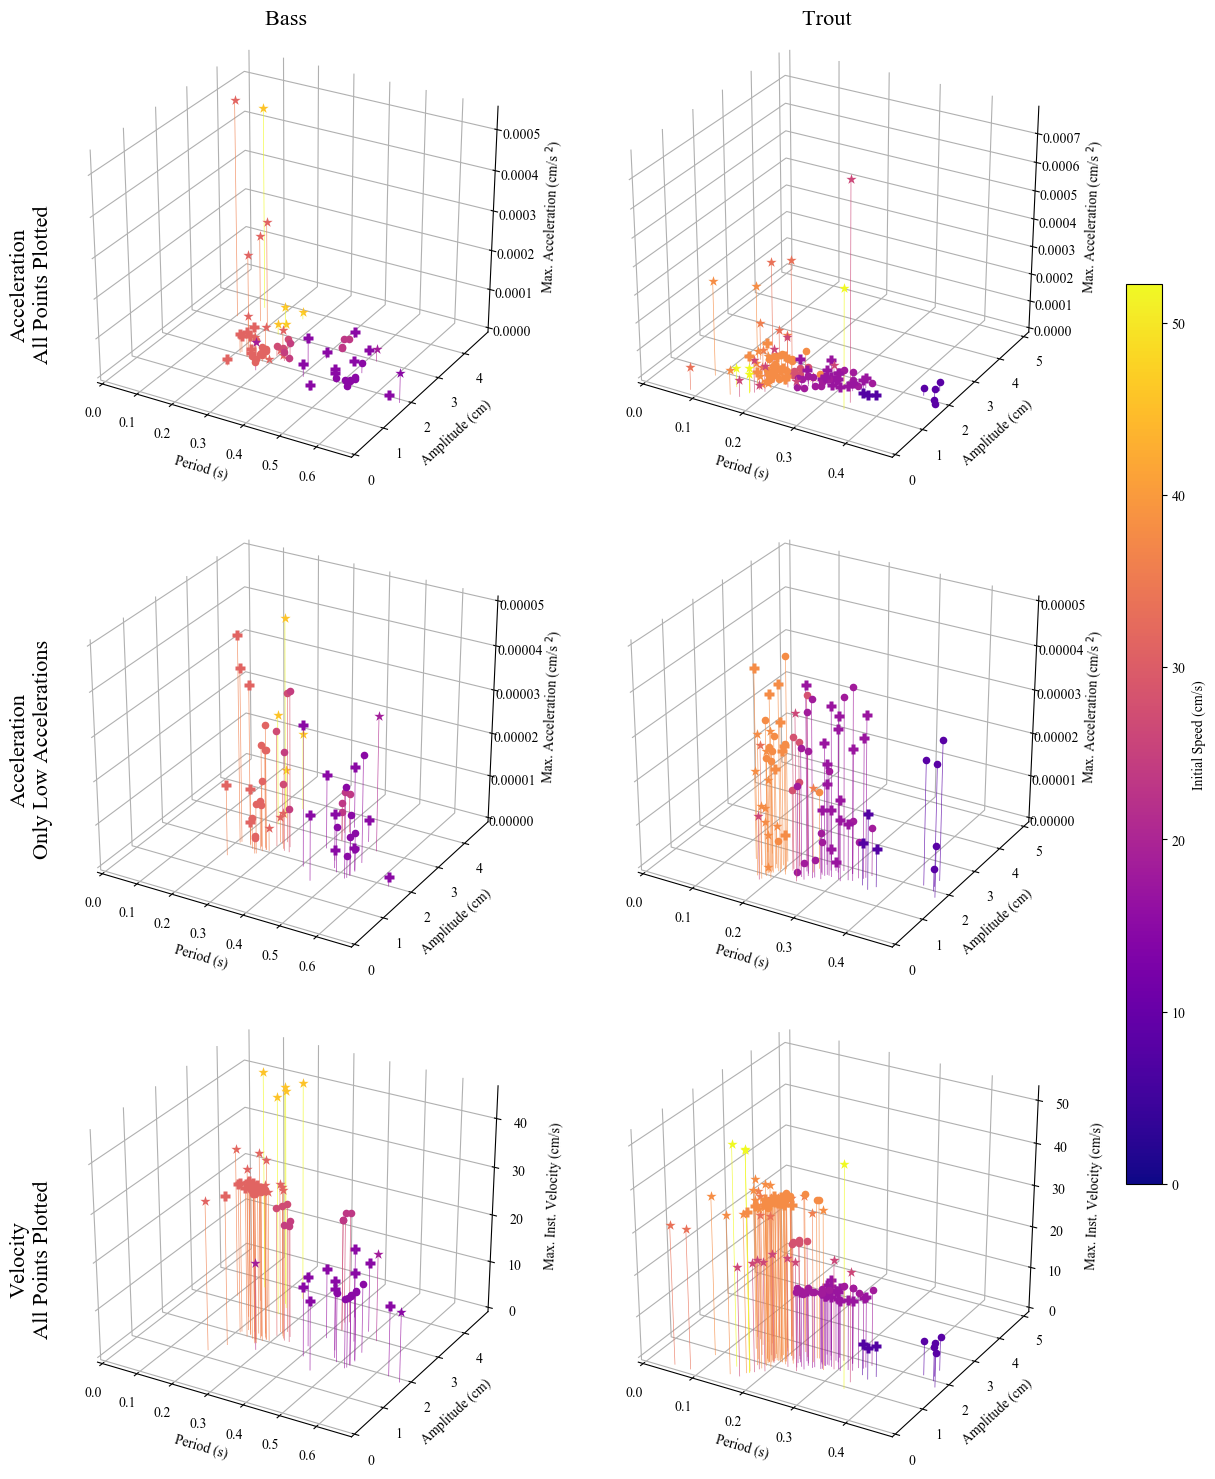

In [77]:
#import matplotlib
#import matplotlib.pyplot as plt
#from plot_analysis_forfig import plot_analysis_forfig

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.style.use('mystyle.mplstyle')



speeds_cb = [0]*len(tracklist.keys())
count_cb= 0
for i in tracklist.keys():
    speeds_cb[count_cb] = tracklist[i]['start_spd']
    count_cb+=1
speed_cb = max(speeds_cb)

fig2 = plt.figure(figsize = (12,15))

ax2_1 = plot_analysis_forfig(3,2,1, bass_subset, finbeat_byP, tracklist, 'A', True, False)  # Bass acc no cutoff
ax2_1.set_title('Bass \n')
ax2_2 = plot_analysis_forfig(3,2,2, trout_subset, finbeat_byP, tracklist, 'A', True, False)  # Trout accel no cutoff
ax2_2.set_title('Trout \n')
ax2_3 = plot_analysis_forfig(3,2,3, bass_subset, finbeat_byP, tracklist, 'A', True, True)  # Bass accel cutoff
ax2_4 = plot_analysis_forfig(3,2,4, trout_subset, finbeat_byP, tracklist, 'A', True, True)  # Trout accel cutoff
ax2_5 = plot_analysis_forfig(3,2,5, bass_subset, finbeat_byP, tracklist, 'V', True, False)  # Bass inst velocity
ax2_6 = plot_analysis_forfig(3,2,6, trout_subset, finbeat_byP, tracklist, 'V', True, False)  # Trout inst. velocity


fig2.text(0, 0.8, 'Acceleration\nAll Points Plotted\n ', va='center', rotation='vertical', fontsize=16, multialignment = 'center')
fig2.text(0, 0.49, 'Acceleration\nOnly Low Accelerations\n ', va='center', rotation='vertical', fontsize=16, multialignment = 'center')
fig2.text(0, 0.15, 'Velocity\nAll Points Plotted\n ', va='center', rotation='vertical', fontsize=16, multialignment = 'center')
#plt.show()
plt.tight_layout()
fig2.subplots_adjust(right=0.9)
cbar_ax = fig2.add_axes([0.93, 0.2, 0.03, 0.6])  # [left, bottom, width, height]
cbar_ax.set_xmargin(0.2)
cmap = matplotlib.cm.plasma
norm = matplotlib.colors.Normalize(vmin=0, vmax=speed_cb)
cb1 = matplotlib.colorbar.ColorbarBase(cbar_ax, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
cb1.set_label('Initial Speed (cm/s)')

#fig2.savefig('Fig2_IndividualFinbeats.pdf', fmt = 'pdf')
#fig2.savefig('Fig2_IndividualFinbeats.svg', fmt = 'svg')
plt.show()



### Trying to figure out wavelets

In [ ]:
import matplotlib.pyplot as plt
import pywt 
from scipy import signal

testdata = tracklist['Bass1S08']['data']['pt2y_smth']
time = tracklist['Bass1S08']['data'].index.values
framerate = float(tracklist['Bass1S08']['FPS'])
scales = np.arange(2,20,1)


wavelet_choice = pywt.Wavelet('bior3.1')
print(wavelet_choice)
for i in np.arange(2,20,1):
    freq = pywt.scale2frequency(wavelet_choice, i)
    print(': scale=',i, ' freq=', freq)

In [ ]:
x = time
data = testdata
wavelet = 'bior3.1'
level = 1
order = 'freq'
interpolation = 'nearest'
cmap = plt.cm.afmhot

wp = pywt.WaveletPacket(data, wavelet, 'symmetric', maxlevel = level)
nodes = wp.get_level(level, order = order)
labels = [n.path for n in nodes]
values = np.array([n.data for n in nodes], 'd')
values = abs(values)
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, bottom=.03, left=.07, right=.97, top=.92)
ax = fig.add_subplot(2, 1, 1)
ax.set_title("Data")
ax.plot(x, data, 'b')
ax.set_xlim(0, x[-1])

ax = fig.add_subplot(2, 1, 2)
ax.set_title("Wavelet packet coefficients at level %d" % level)
ax.imshow(values, interpolation=interpolation, cmap=cmap, aspect="auto",
          origin="lower")
ax.set_yticks(np.arange(0.5, len(labels) + 0.5), labels)

# Show spectrogram and wavelet packet coefficients
fig2 = plt.figure()
ax2 = fig2.add_subplot(211)
ax2.specgram(data, NFFT=64, noverlap=32, Fs=2, cmap=cmap,
             interpolation='bilinear')
ax2.set_title("Spectrogram of signal")
ax3 = fig2.add_subplot(212)
ax3.imshow(values, origin='upper', extent=[-1, 1, -1, 1],
           interpolation='nearest')
ax3.set_title("Wavelet packet coefficients")


plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pywt


x = np.linspace(0, 1, num=512)
data = np.sin(250 * np.pi * x**2)

wavelet = 'db2'
level = 4
order = "freq"  # other option is "normal"
interpolation = 'nearest'
cmap = plt.cm.afmhot

# Construct wavelet packet
wp = pywt.WaveletPacket(data, wavelet, 'symmetric', maxlevel=level)
nodes = wp.get_level(level, order=order)
labels = [n.path for n in nodes]
values = np.array([n.data for n in nodes], 'd')
values = abs(values)

# Show signal and wavelet packet coefficients
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, bottom=.03, left=.07, right=.97, top=.92)
ax = fig.add_subplot(2, 1, 1)
ax.set_title("linchirp signal")
ax.plot(x, data, 'b')
ax.set_xlim(0, x[-1])

ax = fig.add_subplot(2, 1, 2)
ax.set_title("Wavelet packet coefficients at level %d" % level)
ax.imshow(values, interpolation=interpolation, cmap=cmap, aspect="auto",
          origin="lower", extent=[0, 1, 0, len(values)])
ax.set_yticks(np.arange(0.5, len(labels) + 0.5), labels)

# Show spectrogram and wavelet packet coefficients
fig2 = plt.figure()
ax2 = fig2.add_subplot(211)
ax2.specgram(data, NFFT=64, noverlap=32, Fs=2, cmap=cmap,
             interpolation='bilinear')
ax2.set_title("Spectrogram of signal")
ax3 = fig2.add_subplot(212)
ax3.imshow(values, origin='upper', extent=[-1, 1, -1, 1],
           interpolation='nearest')
ax3.set_title("Wavelet packet coefficients")


plt.show()